# Marcus Nguyen Personal Project - Koalas

In [1]:
from IPython.core.display import display, HTML

---
## BUSINESS CONCERN

An eco-tourism business is considering starting a tour for spotting wild Australian native wildlife around Brisbane. They are thinking that Koala spotting maybe a good way to start.


### Question 1: 

Using the occurance records from Atlas of Living Australia, perform an appropriate search and download a CSV file to analyse for recent sightings of Koalas around Brisbane. Use Data Analytics to answer the following question: Is it possible to find Koalas reliably around Brisbane in order to support a tour? 

#### Data:

[Atlas of Living Australia](https://biocache.ala.org.au/#tab_simpleSearch)

*To download data, login with AAF, and select Education as reason for use.*


In [71]:
# Install modules if it doesnt exist
!pip install folium

### 1.1 Question

_The question is asking to analyse the number of sightings of koalas around Brisbane, using data downloaded from Atlas of Living Australia to provide basis for reliable locations that have a high rate of koala occurences to support a koala tour in and around Brisbane_

### 1.2 Data

In [72]:
# Import the data
# import libraries for this question here
import pandas as pd     # To handle data
import numpy as np      # For number computing
import json
file = "records-2021-08-31.csv"
koala_full_records = pd.read_csv(file) 
shape = koala_full_records.shape
#Display data size
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

Number of rows : 1509
Number of columns : 90


**Dataset Selection Justification**
* Records downloaded on 31/08/2021 were filtered via the website to only include data in Queensland as the question only involves the Brisbane area. Only necessary data such as Location based on langtitude and longtitude coordinates were selected as this provides the most accurate location data for sightings.
* Data was also filtered through the website to only include data from this decade (2020 onwards)
    * Data from only this decade were chosen due to in recent years, climate has changed dramatically and its highly likely that koala habitats around Brisbane have changed comapred to past data, hence making them unreliable and inaccurate
* Only records based on human observation of Koalas have been selected as this has been proven to be more accurate

### 1.3 Analysis

In [73]:
# Clean/prepare the data for analysis - make it ready to be processed
##Copy select columns from full records df to a new df for easy analysis
koala_df = koala_full_records[["occurrenceID", "basisOfRecord", "recordID", "stateProvince", "verbatimLocality", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "dcterms:modified"]].copy()
koala_df

,occurrenceID,basisOfRecord,recordID,stateProvince,verbatimLocality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,dcterms:modified
0,https://www.inaturalist.org/observations/72343902,HUMAN_OBSERVATION,887dd790-2a04-4996-847b-f5fadfdcf660,Queensland,"Meadow Road, Logan Reserve, QLD, AU",-27.734433,153.102325,6.0,2021-03-30T01:35:57Z
1,https://www.inaturalist.org/observations/83756732,HUMAN_OBSERVATION,7c657abc-dffa-41eb-92d5-1cb57257973f,Queensland,"Nathan QLD 4111, Australia",-27.545129,153.047417,197.0,2021-06-20T09:09:52Z
2,https://www.inaturalist.org/observations/66311705,HUMAN_OBSERVATION,a222885b-a35f-4072-a243-ebc38b731592,Queensland,"Brisbane QLD, Australia",-27.546663,153.056453,NaN,2021-07-05T20:15:50Z
3,https://www.inaturalist.org/observations/59413591,HUMAN_OBSERVATION,9faaf69d-2dd3-4538-9324-66dbb4759a16,Queensland,"Nathan, Queensland, Australia",-27.549560,153.059867,NaN,2020-09-13T23:13:43Z
4,https://www.inaturalist.org/observations/72346461,HUMAN_OBSERVATION,d6e6f026-9faa-4df1-8c75-c91448c728c1,Queensland,"Whites Hill Reserve, Brisbane QLD, Australia",-27.514486,153.078469,25.0,2021-03-29T21:27:44Z
...,...,...,...,...,...,...,...,...,...
1504,f28567fa-37c8-4a27-92fb-dca41c19b74c,HUMAN_OBSERVATION,cdba0692-5a96-45f7-944e-963a6c85bfe8,Queensland,NaN,-27.534527,152.805285,NaN,2021-01-30T07:37:05Z
1505,93d0802c-9950-43ce-a07a-7fbda50f3fda,HUMAN_OBSERVATION,1233c693-bd3c-4aa9-a47a-a116000eea3e,Queensland,NaN,-27.512861,153.108487,NaN,2021-02-25T01:30:22Z
1506,a87863a4-2193-4f37-84dc-40fa4eabd3d2,HUMAN_OBSERVATION,a01ea041-9795-48b8-8bdc-dafaaa447683,Queensland,NaN,-27.497665,153.206314,NaN,2020-10-26T04:58:45Z
1507,9d6670cd-a4a9-43fe-a503-7f194e19acef,HUMAN_OBSERVATION,0cd608d9-0577-4bee-987d-9e27f2aab114,Queensland,NaN,-27.530463,152.857472,NaN,2021-05-29T11:04:41Z


**Analysis justification**
* Despite some data having NaN for locality, there is still coordinates so those records are still valuabel data
* Since the original dataset had many repititive and blank columns (in total 90 columns) that aren't used in the analysis, a new dataset will be selected from the full records
* Despite some records having NaN for locality, they still have coordinates for occurence which can be used in visualization

In [74]:
# Analyse the data - ensure that you at least use the required technique
locality_occurence_df = koala_df.groupby('verbatimLocality').size()
locality_occurence_df

verbatimLocality
17 Runnymede Rd, Capalaba QLD 4157, Australia            1
300 m sth of Glenora rd                                  1
32 Panoramic Drive, Narangba, Brisbane QLD, Australia    1
9 Hill St, Pittsworth QLD 4356, Australia                1
Alexandra Hills QLD 4161, Australia                      9
                                                        ..
Whites Hill Reserve, Holland Park, QLD, AU               1
Whites Hill Reserve, Queensland 4152, Australia          1
Whites Hill reserve, Brisbane QLD, Australia             1
Wilcox Track, Nathan, QLD, AU                            3
Witta QLD 4552, Australia                                1
Length: 270, dtype: int64

**Analysis justification**
* We can see that there are multiple instances of the same localty but written in different address formats, therefore this analysis does not provide much insight
* In addition, some records are missing locality
* Hence, it is more accurate to use coordiantes of longtitude and lattitude to determine occurence with visualziation

### 1.4 Visualisation

In [75]:
# Visualise the results
import folium

# First we set up the map
x = tuple(zip(koala_df["decimalLatitude"], koala_df[ "decimalLongitude"]))
map_of_occurence = folium.Map(
    location=x[100],
    zoom_start=10, tiles='Stamen Terrain'
)
# Then we add all the coordinates to the map from the data.
for coordinate in x:
    try:
        folium.Circle(
            radius=1,
            location=coordinate,
            color="red",
            fill=False).add_to(map_of_occurence)
    except:
        print(coordinate)
map_of_occurence

### 1.5 Insight

* Based on the visualization of koala occurences from 2020 to the present above, **it is clear that koalas can be found reliably around Brisbane to support a koala spotting tour**.
Areas that have a high rate of koala occurences that prove to be reliable locations for koala tours include
    * Toohey Area
        * Toohey Forest-Mayne Estate
        * Ring Road - especially dense occurence of koalas, most suitable location
        * Toohey Forest Conservation Park
        * Toohey Forest (including sections on both sides of the South East Busway)
        * Wellers Hill
    * Whites Hill Reserve
        * Whites Hill
        * Octantis Street Park
* Toohey Area is recommended over Whites Hill Reserve since the Toohey Area has a much higher rate of reported occurences. 
    * Toohey has both a higher occurence rate and more condensed than Whites Hill
        * Whites Hill occurences are not a lot but its not too few, the problem is that they are spread out, making it inefficient to operate tours
        * Whereas Toohey Area occurences are much higher and focused in specific spots, making tour operations efficient and possible 
    * Proving the area to be a reliable location for koala tours
* Low occurence rate areas such as Tones Road Park and Belmont Bushland Reserve have very few reported human observations of koalas, making them unreliable to support a tour in those areas.
* Since Cleveland & Redland Bay are also considered part of the Brisbane Metropolitan area, just 22km South-East to Brisbane, the business can also consider the option of expanding tour operations here
    * Specifically:
        * Wellington Point
        * GJ Walter Park
        * Nandeebie Park
        * Henry Ziegenfusz Park
*In addition, since all these occurences are from 2020-present, the occurence are as up-to-date as possible, making them reliable sources of information to support tour locations*

---
## QUESTION 2

#### Question: 
Using the *Twitter* API, search for who is using `#koala` and address the question: Who might be potential promotors of the business or possible competitors? 

#### Data access:
[Twitter Development Portal](https://developer.twitter.com/en/portal/projects-and-apps)


In [76]:
# Install modules if it doesnt exist
!pip install tweepy
!pip install textblob

In [77]:
# import libraries for this question here
import tweepy           # To access and consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import json

### 2.1 Question

_To find twitter accounts with a high level of influence that is interested in koalas as well as finding potential competitors also promoting koala tours_

### 2.2 Data

In [78]:
# Access the data via API
# Twitter App access keys
my_secrets = "twitter_credentials.json" # The location of your Twitter API keys
with open(my_secrets,'r') as file:
    credentials = json.load(file)

# Consume:
CONSUMER_KEY    = credentials["api_key"]
CONSUMER_SECRET = credentials["api_secret_key"]

# Access:
ACCESS_TOKEN  = credentials["access_token"]
ACCESS_SECRET = credentials["access_token_secret"]

# API's setup:
def connectToTwitterAPI():
    """
    Utility function to setup the Twitter's API
    with access keys.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication
    api = tweepy.API(auth)
    return api

In [79]:
# Create an extractor object
extractor = connectToTwitterAPI()

# Specify search criteria and extract tweets into a list
tweets = extractor.search(q="#koala", lang = "en", count= 100) # Find the most appropriate hashtag for our purpose

# Print the total number of extracted tweets
print("Number of tweets extracted: {}.\n".format(len(tweets)))

Number of tweets extracted: 100.



In [80]:
# Clean/prepare the data for analysis
black_list = ['NFT', 'nft', '#NFT', 'coin', 'Coin', 'COIN']
filtered_tweets = [] 
#Going through every tweet content and username to filter
for tweet in tweets:
    if any(text in tweet.text for text in black_list):
        #print("FOUND")
        pass
    elif any(text in tweet.user.name for text in black_list):
        #print("Name FOUND")
        pass
    else:
        filtered_tweets.append(tweet)

print("Number of FILTERED tweets extracted: {}.\n".format(len(filtered_tweets)))

Number of FILTERED tweets extracted: 92.



**Cleaning data justification**
* Tweets about NFTs and coins need to be removed as they are not directly related to koalas
    * The recent popularity of #koala and #nft is due to a recently sold NFT koala painting
* RTs are not filtered since There might be a chance that the retweet has an entirely different context compared to the original tweet and that RT also shows interest from the person sharing it 
* It is also possible that some retweets with different opinion/comment gain more popularity than the original one.

### 2.3 Analysis

In [81]:
# Analyse the data - ensure that you at least use the required technique

#function to find followers count
def follower_count(tweet):
    return tweet.user._json['followers_count']

#Print the description from accounts that are influential
influence_tweets = [tweet for tweet in filtered_tweets if follower_count(tweet) > 3000]

#Print details on influential accounts that tweeted about #koala
for in_tweet in influence_tweets:
    print("------------------------------------------------------------------")
    print(in_tweet.user.name)
    print("Number of followers: " + str(follower_count(in_tweet))) 
    print(in_tweet.user.description)

------------------------------------------------------------------
Jack and Jill Kids Natural Care
Number of followers: 3373
Celebrating natural oral and body care for babies & kids.  SAFE. FUN. YUM. Biodegradable Toothbrushes. Zero WASTE.
------------------------------------------------------------------
🌸Danielle🌸
Number of followers: 4853
♡◇♡ The quality of your thinking determines the quality of your life.♡◇♡
------------------------------------------------------------------
ソーゾー
Number of followers: 6911
元パリコレ等のニッタ―　現　発明家　プラスチックごみ半減の安全空間のある　買い物かごで特許取得　マイバックコンテストで環境大臣賞優秀賞受賞 　来春中身が酸化しないリターナブル瓶を出願予定　　#改憲阻止   反差別　 反戦争　反原発　反辺野古新基地　＃安倍の逮捕はまだですか　＃河野さんにブロックされています📢
------------------------------------------------------------------
Rock & Tattoo Lady...😷
Number of followers: 24298
You don't have to be rich, you don't have to be famous, you don't have to be pretty, Only a big heart bears fruit/
NO DM⛔ NO PORN ⛔ NO GROUPS⛔
#Animalright 🐾🐾
------------------------------------------------------

**Analysis Justification**
* 3000 followers was chosen as the minimum follower count because that has been discovered to be the minimum followers to be considered influential

In [82]:
print("Number of tweets from accounts with more than 3000 followers: {}".format(len(influence_tweets)))
print("All tweets from influential accounts:\n")
for tweet in influence_tweets:
    print(tweet.user.name)
    print(tweet.text)
    print("----------------------------------------------------------------------------")
    print("\n")
print("-----------------------------------END OF SECTION-----------------------------------------")

Number of tweets from accounts with more than 3000 followers: 15
All tweets from influential accounts:

Jack and Jill Kids Natural Care
Cutest baby Koala ever! 💚 #JnJSundaySmiles
We love supporting @australiankoalafoundation A Primary non-profit organ… https://t.co/nmdwK4jfCg
----------------------------------------------------------------------------


🌸Danielle🌸
RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…
----------------------------------------------------------------------------


ソーゾー
RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…
----------------------------------------------------------------------------


Rock & Tattoo Lady...😷
RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…
------------------------

In [83]:
# Create a pandas dataframe with columns: Tweets, len, ID, Date, Source, Likes, RTs
influence_df = pd.DataFrame(columns = ["Tweets", "len", "ID","Followers", "Date", "Likes", "RTs"])

# Add relavant data from each INFLUENTIAL TWEET
for tweet in influence_tweets:
    influence_df = influence_df.append({"Tweets": tweet.text,
                       "len": len(tweet.text),
                       "ID": tweet.user.name,
                        "Followers": follower_count(tweet), 
                       "Date": tweet.created_at,
                       "Likes": tweet.favorite_count,
                       "RTs": tweet.retweet_count}, ignore_index = True)

# Display the dataframe
influence_df.sort_values(by='Followers', ascending=False)

,Tweets,len,ID,Followers,Date,Likes,RTs
4,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,Tugay Hatayli,64506,2021-09-11 17:20:40,0,620
3,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,Rock & Tattoo Lady...😷,24298,2021-09-11 17:45:59,0,620
12,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,ムラサキノカガミ👾,16355,2021-09-11 15:17:32,0,620
2,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,ソーゾー,6911,2021-09-11 18:18:19,0,620
5,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,✿✿ᏕᏇᏋᏋᏖ✿✿,6635,2021-09-11 17:08:03,0,620
14,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,💓Daniela Chirico💓,6231,2021-09-11 14:04:14,0,620
13,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,Cecilia Aravena,4941,2021-09-11 15:02:14,0,620
1,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,🌸Danielle🌸,4853,2021-09-11 18:35:00,0,620
6,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,Tom Coleman-Success Strategies Taught Here,3896,2021-09-11 17:03:19,0,620
7,RT @NiceBoyKimo: Koala is not a bear but a mar...,140,🖤 Tia 🖤,3741,2021-09-11 16:56:13,0,620


In [84]:
# Extract the tweet with the highest number of likes and retweets
maxLikes = influence_df["Likes"].max()
maxRetweets  = influence_df["RTs"].max()

fav = influence_df[influence_df.Likes == maxLikes].index[0] 
rt  = influence_df[influence_df.RTs == maxRetweets].index[0]

# Max FAVs:
print("-------------------Most Likes-------------------")
print("The tweet with most likes is: \n{}".format(influence_df['Tweets'][fav]))
print("From Twitter account: {}".format(influence_df['ID'][fav]))
print("Number of likes: {}".format(maxLikes))
print("-------------------END-------------------")
# Max RTs:
print('\n')
print("-------------------Most ReTweets-------------------")
print("The tweet with most retweets is: \n{}".format(influence_df['Tweets'][rt]))
print("From Twitter account: {}".format(influence_df['ID'][rt]))
print("Number of retweets: {}".format(maxRetweets))
print("-------------------END-------------------")

-------------------Most Likes-------------------
The tweet with most likes is: 
Cutest baby Koala ever! 💚 #JnJSundaySmiles
We love supporting @australiankoalafoundation A Primary non-profit organ… https://t.co/nmdwK4jfCg
From Twitter account: Jack and Jill Kids Natural Care
Number of likes: 0
-------------------END-------------------


-------------------Most ReTweets-------------------
The tweet with most retweets is: 
RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…
From Twitter account: 🌸Danielle🌸
Number of retweets: 620
-------------------END-------------------


In [85]:
#Converting Followers data type to numeric
influence_df['Followers'] = pd.to_numeric(influence_df['Followers'])

#Data on followers of each account that tweeted about koalas to remove repitition of accounts
#Create dataframe for influential accounts data
influential_accounts_df = influence_df.groupby(['ID']).agg({'Followers': 'first'})
#Create dataframe for influential accounts interaction on tweets
tweet_interaction_df = influence_df.groupby(['ID']).agg({'Likes': 'sum', 'RTs':'sum'})

#Calculate percentage of influential accounts and tweet
influencePercent = len(influence_tweets)/len(filtered_tweets)
#Percentage of normal FILTERED tweets
normalPercent = 1 - influencePercent 
print("The percentage of influential tweets is {:.2%}".format(influencePercent))

The percentage of influential tweets is 16.30%


In [86]:
# Extract the tweet the 3 most influential users
maxFollowers = influence_df["Followers"].max()
most_influential_df = influence_df.nlargest(3, columns=['Followers'])

most_famous = influence_df[influence_df.Followers == maxFollowers].index[0] 

# Top 3 most influential accounts
print("-----------------Top 3 most influential accounts-----------------")
for ind in most_influential_df.index:
    print("Twitter account with top 3 highest followers: {}".format(most_influential_df['ID'][ind]))
    print("Their follower count: {}".format(most_influential_df['Followers'][ind]))
    print("Their #koala tweet: {}".format(most_influential_df['Tweets'][ind]))
    print('\n')

# Most famous:
print('\n')
print("-----------------Most influential account-----------------")
print("Twitter account with the most followers: {}".format(influence_df['ID'][most_famous]))
print("Their follower count: {}".format(influence_df['Followers'][most_famous]))
print("Their tweet was: {}".format(influence_df['Tweets'][most_famous]))


-----------------Top 3 most influential accounts-----------------
Twitter account with top 3 highest followers: Tugay Hatayli
Their follower count: 64506
Their #koala tweet: RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…


Twitter account with top 3 highest followers: Rock & Tattoo Lady...😷
Their follower count: 24298
Their #koala tweet: RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…


Twitter account with top 3 highest followers: ムラサキノカガミ👾
Their follower count: 16355
Their #koala tweet: RT @NiceBoyKimo: Koala is not a bear but a marsupial. Picky eaters, eucalyptus leaves with high water contents. Surprisingly poisonous to m…




-----------------Most influential account-----------------
Twitter account with the most followers: Tugay Hatayli
Their follower count: 64506
Their tweet was: RT @NiceBoyKimo

### 2.4 Visualisation

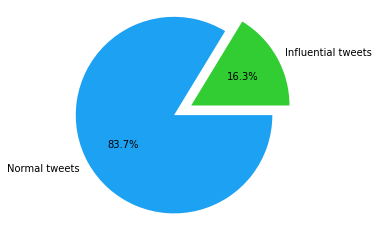

In [87]:
# Visualise the results
#use tute 5 pie chart to calcualte influetial tweets compared to normal tweets
# For plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

labels = ['Influential tweets', 'Normal tweets']
pieexplode = [0.2, 0]
sizes = [influencePercent, normalPercent]

# Set different colors
colors = ['#32CD32', '#1DA1F2']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode = pieexplode)
plt.axis('equal')
plt.show()

<AxesSubplot:title={'center':'Top 10 influential accounts that tweeted #koala'}, ylabel='Twitter ID'>

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12461 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12459 missing from current font.
  font.set_

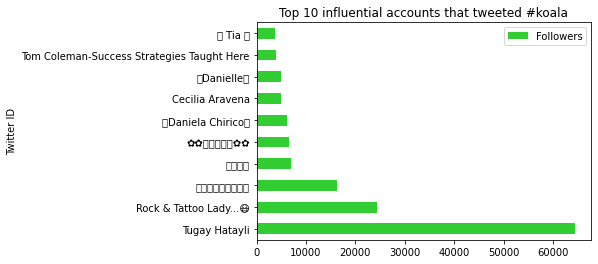

In [88]:
#Do not mind the error codes below, they do not affect the visualization as it is a warning since some IDs have strange characters
#Visualizing follower count for top 10 most influential Twitter accounts on #koala
influential_accounts_df.nlargest(10, columns=['Followers']).plot.barh(title="Top 10 influential accounts that tweeted #koala", xlabel="Twitter ID", ylabel="Follower Count", color='#32CD32')

<AxesSubplot:title={'center':'Top 10  Twitter Accounts with Highest Tweet Interaction on #koala'}, ylabel='Twitter ID'>

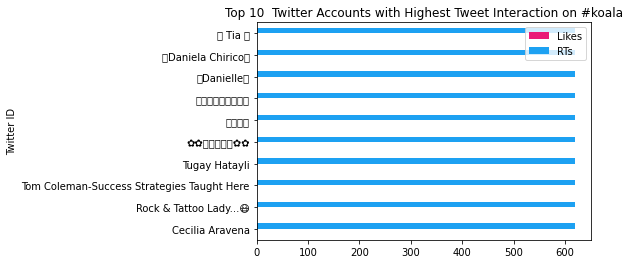

In [89]:
#Do not mind the error codes below, they do not affect the visualization as it is a warning since some IDs have strange characters
#Visualizing tweet interaction for top 10 most popular tweets on #koala
tweet_interaction_df.nlargest(10, columns=['Likes', 'RTs']).plot.barh(title="Top 10  Twitter Accounts with Highest Tweet Interaction on #koala", xlabel="Twitter ID", ylabel="Tweet Interaction", color={"Likes": "#ea1a77", "RTs": "#1DA1F2"})

### 2.5 Insight

Since Twitter API is limited to retrieving the most recent 100 tweets and only tweets from the past 7 days. The insight will be generalized to provide insight and reasons to support the reason why **the 3 users with the highest follower count** should be selected for advertisement and how they were found.
* It is recommended for the 3 Twitter accounts that have been analysed, identified and visualized above to be potential promoters for the business. With a higher amount of of followers, promoters can influence more people and reach a wider customer base, allowing the tour to reach more audiences. 
* The 3 potential promoters were found based on the condition that:
    * Twitter accounts were filtered to have a minimum of 3000 followers
        * To be considered influential on social media, [sources](https://www.tribegroup.co/blog/influencer-followers?) have reported the minimum follower count to be 3000
    * The filtered data on tweets are then sorted based on Follower count in descending order, duplicates are then removed to find the 3 most followed accounts that tweeted on #koala
        * 3 most followed accounts have been selected as the number three is a comprehensive number to select the 3 most followed influencers that enables the business to identify a variety of different promoters and select from them
    
* With the analysis, the business is also able to identify potential competitors in the market based on the Twitter accounts ID name and their account description if they are a zoo/wild life tour business based on their Twitter ID and user description in the output above in Analysis

However, there are some limitations to this Twitter Analysis:
* Twitter API is limited to pulling a maximum of 100 tweets per extraction
    * 100 tweets is not a substantial number of data to support justifcations and recommendations
    * Due to the limited tweet extraction, it doesnt give a full understanding of the use of the #koala hashtag
* Tweets are only from the most recent 7 days
    * Therefore, tweets from more than 7 days before the execution of this code is unable to be retrieved
    * More potential promoters/competitors might not have made a tweet in the most recent 7 days, hence, they could not be identified in some analysis depending on the time of code execution
* There are alot of Retweets in the data and there are many data where they are retweets of 1 particular tweet
    * However, RTs are still kept in the analysis since RTs are ways that users can quickly share a tweet that they like and additionally, if they want to, add comments to it. This shows that user has interest in #koala.